<h1>Comments on Notebook</h1>
<p>Another attemp at building code with well known example.
the typical california houseing data</p>


In [16]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    housing.data, housing.target, random_state=42
)

In [1]:
import tensorflow as tf

In [35]:
callbacks = [
    tf.keras.callbacks.TensorBoard(
        log_dir='Experiments',
        histogram_freq=1
    )
]

In [2]:
tf. random.set_seed(42)

In [10]:
# Define inputs
input_wide = tf.keras.layers.Input(shape=[5])
input_deep = tf.keras.layers.Input(shape=[6])

# Normalization layers
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()

# Normalize inputs
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)

# Deep path
hidden1 = tf.keras.layers.Dense(30, activation='relu')(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation='relu')(hidden1)

# Concatenate the normalized wide input and the deep path output
concat = tf.keras.layers.Concatenate()([norm_wide, hidden2])

# Output layer
output = tf.keras.layers.Dense(1)(concat)

# Build the model
model = tf.keras.models.Model(inputs=[input_wide, input_deep], outputs=output)

# Print model summary
model.summary()



Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9       │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_9     │ (None, 6)         │         13 │ input_layer_9[0]… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_8       │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 30)        │        210 │ normalization_9[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_8     │ (None, 5)         │         11 │ input_layer_8[0]… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 30)        │        930 │ dense_12[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_4       │ (None, 35)        │          0 │ normalization_8[… │
│ (Concatenate)       │                   │            │ dense_13[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 1)         │         36 │ concatenate_4[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,200 (4.70 KB)

 Trainable params: 1,176 (4.59 KB)

 Non-trainable params: 24 (104.00 B)

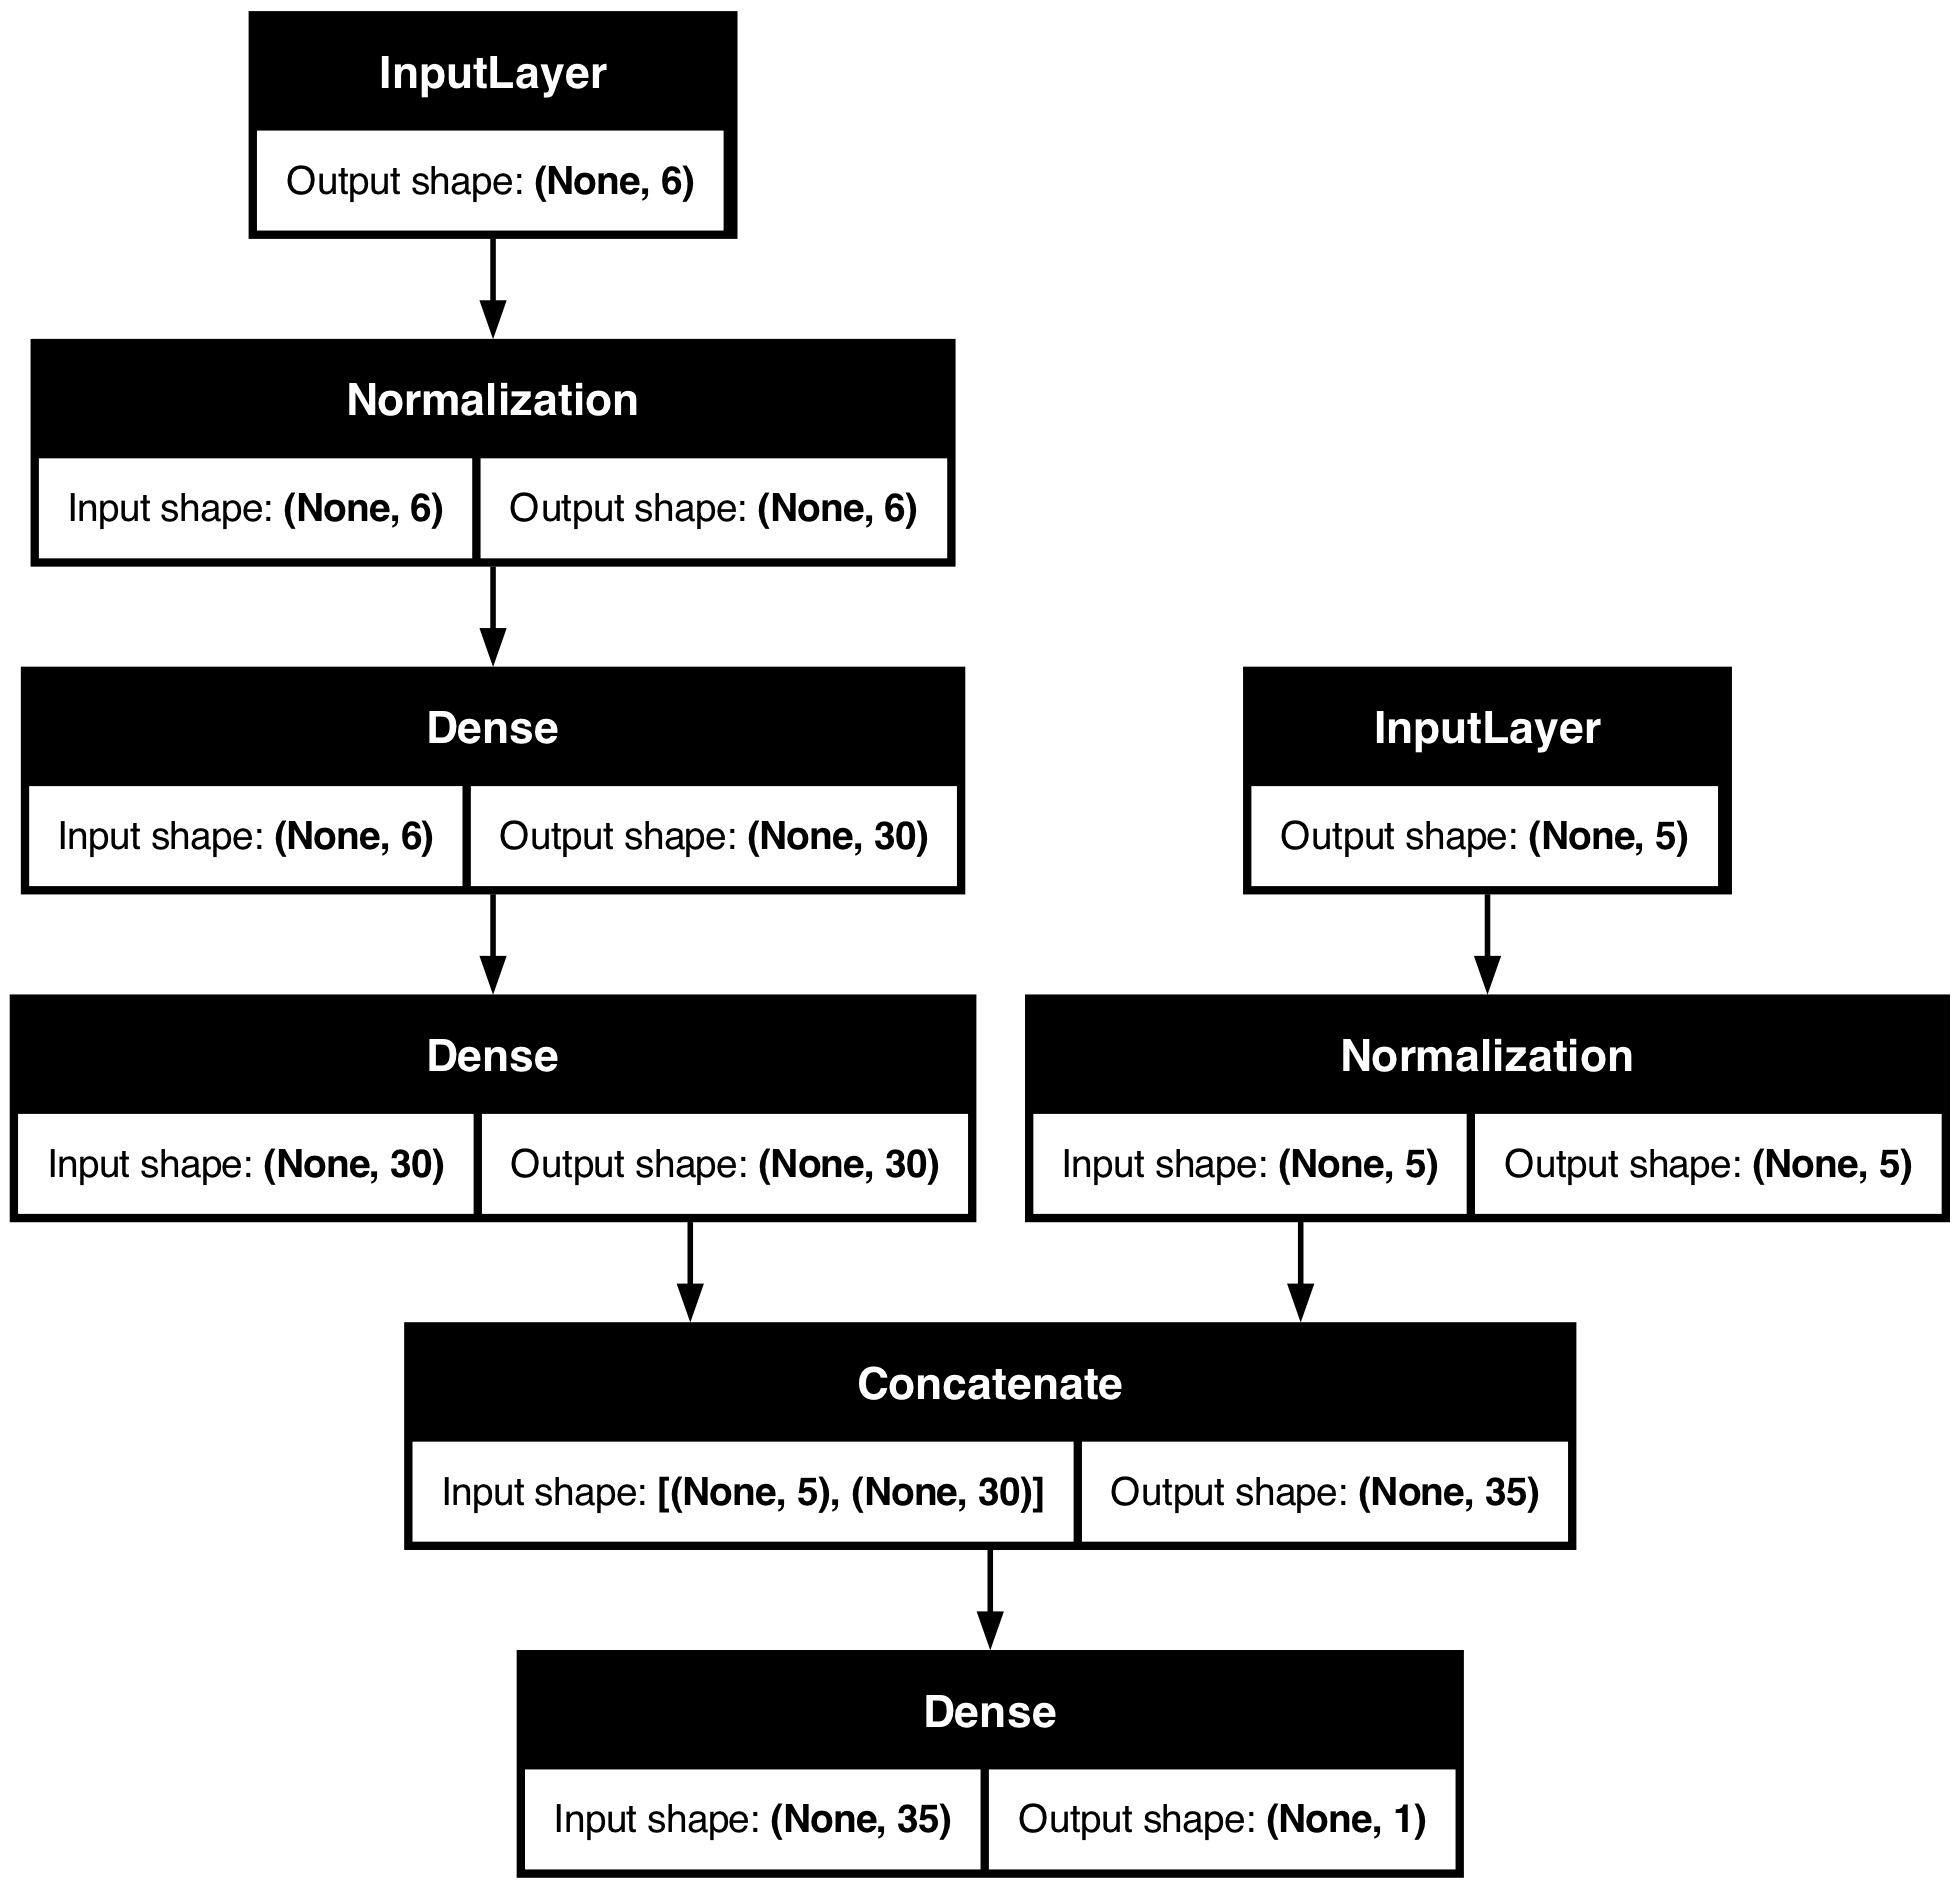

In [13]:
# Plot the model
tf.keras.utils.plot_model(model, 'my_model.png', show_shapes=True)


In [14]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

model.compile(
    loss='mse',
    optimizer=optimizer,
    metrics=['RootMeanSquaredError']
)

In [25]:
X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]


In [36]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)

history = model.fit((X_train_wide, X_train_deep),
                    y_train,
                    epochs=20,
                    validation_split=0.2,
                    callbacks=callbacks)

Epoch 1/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.5466 - loss: 0.2989 - val_RootMeanSquaredError: 0.5766 - val_loss: 0.3325
Epoch 2/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - RootMeanSquaredError: 0.5473 - loss: 0.2996 - val_RootMeanSquaredError: 0.5756 - val_loss: 0.3314
Epoch 3/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - RootMeanSquaredError: 0.5464 - loss: 0.2987 - val_RootMeanSquaredError: 0.5752 - val_loss: 0.3309
Epoch 4/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - RootMeanSquaredError: 0.5458 - loss: 0.2980 - val_RootMeanSquaredError: 0.5759 - val_loss: 0.3317
Epoch 5/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - RootMeanSquaredError: 0.5493 - loss: 0.3018 - val_RootMeanSquaredError: 0.5728 - val_loss: 0.3281
Epoch 6/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - RootMeanSquaredError: 0.5441 - loss: 0.2961 - val_RootMeanSquaredError: 0.5729 - val_loss: 0.3282
Epoch 7/20
387/387 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - RootMeanSquaredError: 

In [37]:
test_scores = model.evaluate((X_test_wide, X_test_deep), y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - RootMeanSquaredError: 0.5580 - loss: 0.3116


In [38]:
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

In [39]:
y_pred = model.predict((X_new_wide, X_new_deep))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


array([[0.44228208],
       [0.93055034],
       [4.149348  ]], dtype=float32)

In [40]:
y_test[:3]

array([0.477  , 0.458  , 5.00001])